In [1]:
%reload_kedro

[06/04/24 09:24:53] INFO     Resolved project path as:                                              ]8;id=55622;file://C:\Users\9509298u\AppData\Local\miniconda3\envs\ocp7-scoring-model-cloud\lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=922997;file://C:\Users\9509298u\AppData\Local\miniconda3\envs\ocp7-scoring-model-cloud\lib\site-packages\kedro\ipython\__init__.py#164\164]8;;\
                             C:\Users\9509298u\Documents\GitHub\OC_Projects\ocp7-scoring-model-clou                
                             d.                                                                                    
                             To set a different path, run '%reload_kedro <project_root>'                           

                    INFO     Registering new custom resolver: 'km.random_name'                    ]8;id=249230;file://C:\Users\9509298u\AppData\Local\miniconda3\envs\ocp7-scoring-model-cloud\lib\site-packages\kedro_mlflow\framework\hooks\mlflow_hook.py\mlflow_hook.py]8;;\:]8;id=199106;file://C:\Users\9509298u\AppData\Local\miniconda3\envs\ocp7-scoring-model-cloud\lib\site-packages\kedro_mlflow\framework\hooks\mlflow_hook.py#65\65]8;;\

                    INFO     The 'tracking_uri' key in mlflow.yml is relative            ]8;id=780472;file://C:\Users\9509298u\AppData\Local\miniconda3\envs\ocp7-scoring-model-cloud\lib\site-packages\kedro_mlflow\config\kedro_mlflow_config.py\kedro_mlflow_config.py]8;;\:]8;id=490143;file://C:\Users\9509298u\AppData\Local\miniconda3\envs\ocp7-scoring-model-cloud\lib\site-packages\kedro_mlflow\config\kedro_mlflow_config.py#260\260]8;;\
                             ('server.mlflow_(tracking|registry)_uri = mlruns'). It is                             
                             converted to a valid uri:                                                             
                             'file:///C:/Users/9509298u/Documents/GitHub/OC_Projects/ocp                           
                             7-scoring-model-cloud/mlruns'                                                         

[06/04/24 09:24:54] INFO     Kedro project ocp7_scoring_model_cloud                                 ]8;id=244203;file://C:\Users\9509298u\AppData\Local\miniconda3\envs\ocp7-scoring-model-cloud\lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=567459;file://C:\Users\9509298u\AppData\Local\miniconda3\envs\ocp7-scoring-model-cloud\lib\site-packages\kedro\ipython\__init__.py#134\134]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and            ]8;id=357255;file://C:\Users\9509298u\AppData\Local\miniconda3\envs\ocp7-scoring-model-cloud\lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=537628;file://C:\Users\9509298u\AppData\Local\miniconda3\envs\ocp7-scoring-model-cloud\lib\site-packages\kedro\ipython\__init__.py#135\135]8;;\
                             'pipelines'                                                                           

                    INFO     Registered line magic 'run_viz'                                        ]8;id=118761;file://C:\Users\9509298u\AppData\Local\miniconda3\envs\ocp7-scoring-model-cloud\lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=866397;file://C:\Users\9509298u\AppData\Local\miniconda3\envs\ocp7-scoring-model-cloud\lib\site-packages\kedro\ipython\__init__.py#141\141]8;;\

In [2]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.dummy import DummyClassifier
import lightgbm as lgb

import matplotlib.pyplot as plt

import mlflow

import shap

In [3]:
train_df = catalog.load("full_df_train")
test_df = catalog.load("full_df_test")

[06/04/24 09:25:07] INFO     Loading data from full_df_train (ParquetDataset)...                ]8;id=290231;file://C:\Users\9509298u\AppData\Local\miniconda3\envs\ocp7-scoring-model-cloud\lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=436893;file://C:\Users\9509298u\AppData\Local\miniconda3\envs\ocp7-scoring-model-cloud\lib\site-packages\kedro\io\data_catalog.py#483\483]8;;\

In [4]:
model = mlflow.sklearn.load_model('../src/ocp7_scoring_model_cloud/Model_API/production_model')

In [7]:
explainer = shap.Explainer(model)

In [17]:
X = train_df.head(1).drop(["TARGET", "SK_ID_CURR"], axis=1)

In [18]:
X

,PREV_NAME_PAYMENT_TYPE_Noncashfromyouraccount_MEAN,AMT_GOODS_PRICE,PREV_AMT_ANNUITY_MAX,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_Electricity,NAME_CONTRACT_TYPE_Revolvingloans,PREV_NAME_CONTRACT_TYPE_XNA_MEAN,PREV_NAME_CASH_LOAN_PURPOSE_Other_MEAN,NAME_HOUSING_TYPE_Coopapartment,BURO_CNT_CREDIT_PROLONG_SUM,...,PREV_WEEKDAY_APPR_PROCESS_START_TUESDAY_MEAN,PREV_AMT_APPLICATION_MAX,BURO_DAYS_CREDIT_MAX,NAME_EDUCATION_TYPE_Incompletehigher,NAME_INCOME_TYPE_Unemployed,PREV_NAME_CASH_LOAN_PURPOSE_Purchaseofelectronicequipment_MEAN,ORGANIZATION_TYPE_Insurance,PREV_AMT_GOODS_PRICE_MAX,FLAG_DOCUMENT_11,OCCUPATION_TYPE_Salesstaff
0,0.0,0.077441,0.02213,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.030608,0.96475,0.0,0.0,0.0,0.0,0.030608,0.0,0.0


In [19]:
import requests

In [21]:
data = {'dataframe_records': X.to_dict(orient = 'records')}

In [34]:
response = requests.post("http://127.0.0.1:8000/explain_local", json=data)

In [35]:
response.json()


{
    'shap_values': [
        [
            0.0,
            0.05446466743644533,
            0.0006144689357611509,
            0.0,
            0.0,
            0.004298820675387536,
            -1.5157677145282064e-05,
            -8.075888615114061e-06,
            0.0,
            0.0,
            -0.0027138356124644723,
            0.007816135177166934,
            -1.46914052502189e-05,
            0.0,
            -0.0022567573125862493,
            -0.00011520332374534957,
            -5.130644240951752e-05,
            -3.407599051917466e-05,
            0.006684366829983292,
            0.0,
            0.0,
            0.08660505477818196,
            0.0,
            -0.036011560828914775,
            -0.06780599984421198,
            0.039247127027765664,
            0.0,
            0.0,
            0.004011222448971046,
            -0.0010684040834739391,
            -0.0007209903909348303,
            0.0,
            0.0,
            -2.441018982655498e-05,
        

In [29]:
shap_values = explainer(X)
shap_values[0]


.values =
array([ 0.00000000e+00,  5.44646674e-02,  6.14468936e-04,  0.00000000e+00,
        0.00000000e+00,  4.29882068e-03, -1.51576771e-05, -8.07588862e-06,
        0.00000000e+00,  0.00000000e+00, -2.71383561e-03,  7.81613518e-03,
       -1.46914053e-05,  0.00000000e+00, -2.25675731e-03, -1.15203324e-04,
       -5.13064424e-05, -3.40759905e-05,  6.68436683e-03,  0.00000000e+00,
        0.00000000e+00,  8.66050548e-02,  0.00000000e+00, -3.60115608e-02,
       -6.78059998e-02,  3.92471270e-02,  0.00000000e+00,  0.00000000e+00,
        4.01122245e-03, -1.06840408e-03, -7.20990391e-04,  0.00000000e+00,
        0.00000000e+00, -2.44101898e-05, -1.94312780e-04,  0.00000000e+00,
        1.22963836e-03,  0.00000000e+00, -1.10530133e-04,  3.30263021e-03,
       -9.37018134e-03, -9.18215290e-04, -1.01538888e-04,  0.00000000e+00,
        9.83587276e-03, -1.28718300e-03,  0.00000000e+00, -1.57142705e-03,
        0.00000000e+00,  2.71014040e-02, -1.39721118e-03,  8.93375968e-03,
       -1.6279

In [38]:
shap_values


.values =
array([[ 0.00000000e+00,  5.44646674e-02,  6.14468936e-04,
         0.00000000e+00,  0.00000000e+00,  4.29882068e-03,
        -1.51576771e-05, -8.07588862e-06,  0.00000000e+00,
         0.00000000e+00, -2.71383561e-03,  7.81613518e-03,
        -1.46914053e-05,  0.00000000e+00, -2.25675731e-03,
        -1.15203324e-04, -5.13064424e-05, -3.40759905e-05,
         6.68436683e-03,  0.00000000e+00,  0.00000000e+00,
         8.66050548e-02,  0.00000000e+00, -3.60115608e-02,
        -6.78059998e-02,  3.92471270e-02,  0.00000000e+00,
         0.00000000e+00,  4.01122245e-03, -1.06840408e-03,
        -7.20990391e-04,  0.00000000e+00,  0.00000000e+00,
        -2.44101898e-05, -1.94312780e-04,  0.00000000e+00,
         1.22963836e-03,  0.00000000e+00, -1.10530133e-04,
         3.30263021e-03, -9.37018134e-03, -9.18215290e-04,
        -1.01538888e-04,  0.00000000e+00,  9.83587276e-03,
        -1.28718300e-03,  0.00000000e+00, -1.57142705e-03,
         0.00000000e+00,  2.71014040e-02, -1.

In [33]:
shap_values.values.tolist()


[
    [
        0.0,
        0.05446466743644533,
        0.0006144689357611509,
        0.0,
        0.0,
        0.004298820675387536,
        -1.5157677145282064e-05,
        -8.075888615114061e-06,
        0.0,
        0.0,
        -0.0027138356124644723,
        0.007816135177166934,
        -1.46914052502189e-05,
        0.0,
        -0.0022567573125862493,
        -0.00011520332374534957,
        -5.130644240951752e-05,
        -3.407599051917466e-05,
        0.006684366829983292,
        0.0,
        0.0,
        0.08660505477818196,
        0.0,
        -0.036011560828914775,
        -0.06780599984421198,
        0.039247127027765664,
        0.0,
        0.0,
        0.004011222448971046,
        -0.0010684040834739391,
        -0.0007209903909348303,
        0.0,
        0.0,
        -2.441018982655498e-05,
        -0.00019431278032559004,
        0.0,
        0.0012296383635954416,
        0.0,
        -0.00011053013259921325,
        0.003302630207647194,
        -0.00937

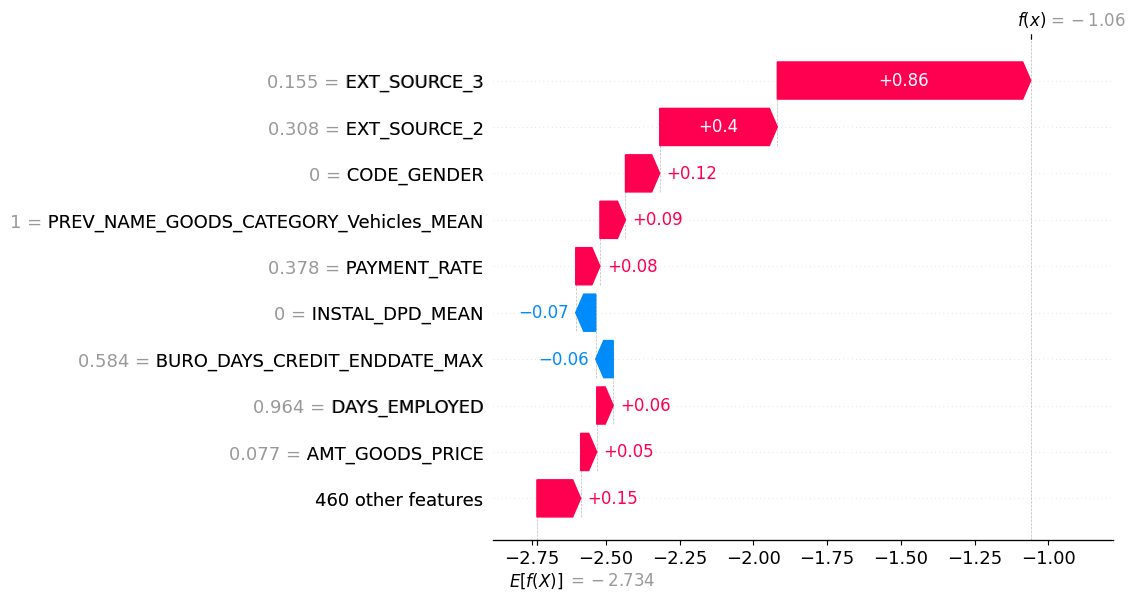

In [9]:


# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])

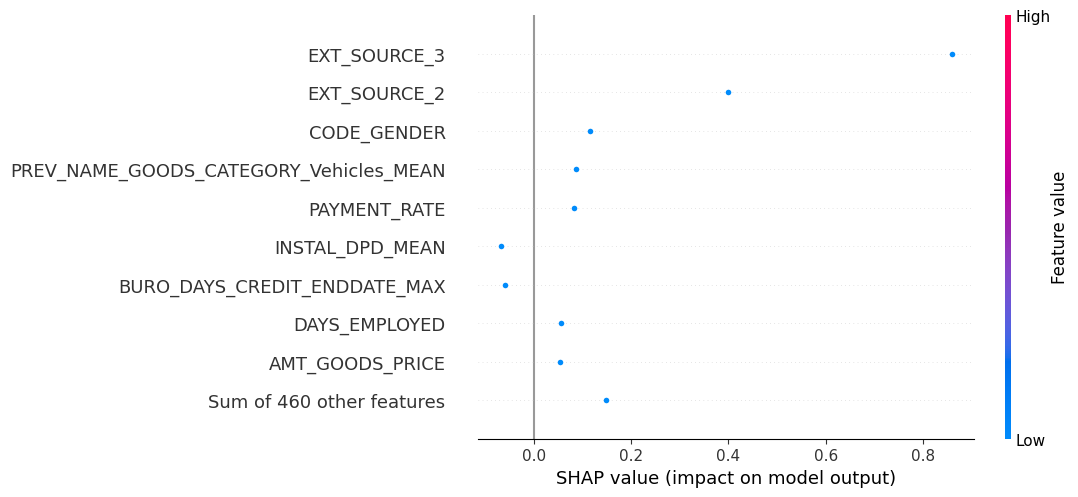

In [13]:
# summarize the effects of all the features
shap.plots.beeswarm(shap_values)

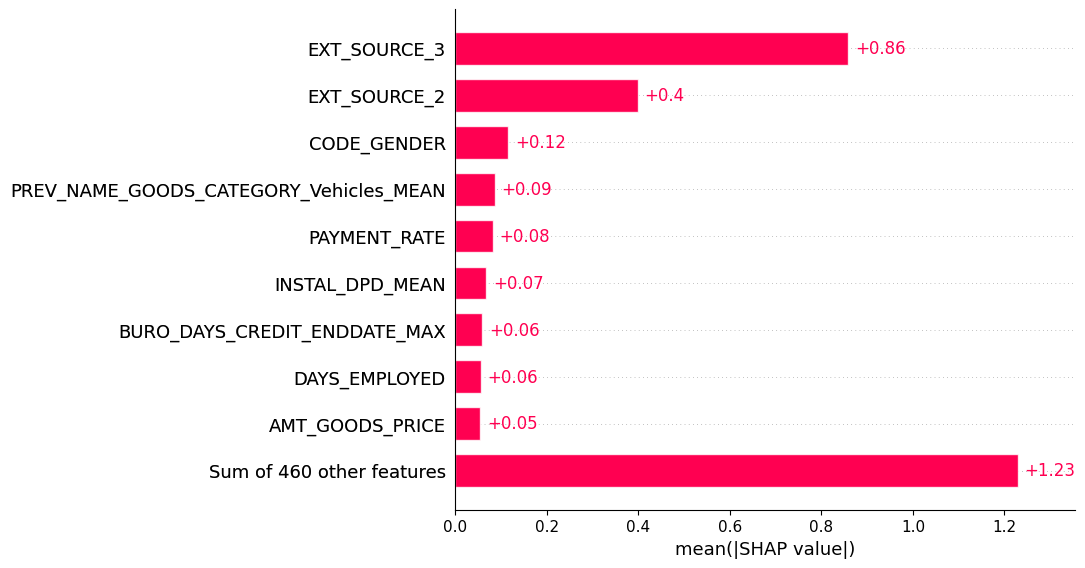

In [15]:
shap.plots.bar(shap_values)